In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style


In [29]:
#importing the dataset
df = pd.read_csv('framingham.csv')

In [30]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
#getting an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [32]:
#separating the categorical and numerical values after observing the number of unique classes
cat = []
num = []
for col in df.columns:
    print("unique classes are:", df[col].nunique())
    if df[col].nunique() < 5:
        cat.append(col)
    else:
        num.append(col)

unique classes are: 2
unique classes are: 39
unique classes are: 4
unique classes are: 2
unique classes are: 33
unique classes are: 2
unique classes are: 2
unique classes are: 2
unique classes are: 2
unique classes are: 248
unique classes are: 234
unique classes are: 146
unique classes are: 1363
unique classes are: 73
unique classes are: 143
unique classes are: 2


In [33]:
print("categorical features: ", cat)
print("numerical features: ", num)

categorical features:  ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
numerical features:  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [34]:
#using describe to gain further insight
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0
glucose,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.000,394.0


In [35]:
# didn't worked as planned
df[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.0,0.0,0.0,1.0,1.0
education,4133.0,1.978950,1.019791,1.0,1.0,2.0,3.0,4.0
currentSmoker,4238.0,0.494101,0.500024,0.0,0.0,0.0,1.0,1.0
BPMeds,4185.0,0.029630,0.169584,0.0,0.0,0.0,0.0,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.0,0.0,0.0,1.0,1.0
diabetes,4238.0,0.025720,0.158316,0.0,0.0,0.0,0.0,1.0
TenYearCHD,4238.0,0.151958,0.359023,0.0,0.0,0.0,0.0,1.0


In [36]:
# fixing the problem by changing categorical to object type from int and float
for col in cat:
    df[col] = df[col].astype(object)

In [37]:
#after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 529.9+ KB


In [38]:
# using describe again
df[cat].describe()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238,4133.0,4238,4185.0,4238,4238,4238,4238
unique,2,4.0,2,2.0,2,2,2,2
top,0,1.0,0,0.0,0,0,0,0
freq,2419,1720.0,2144,4061.0,4213,2922,4129,3594


In [39]:
for col in cat:
    print(col.upper(), " : ", df[col].nunique())
    print(df[col].value_counts().sort_values())
    print()

MALE  :  2
male
1    1819
0    2419
Name: count, dtype: int64

EDUCATION  :  4
education
4.0     473
3.0     687
2.0    1253
1.0    1720
Name: count, dtype: int64

CURRENTSMOKER  :  2
currentSmoker
1    2094
0    2144
Name: count, dtype: int64

BPMEDS  :  2
BPMeds
1.0     124
0.0    4061
Name: count, dtype: int64

PREVALENTSTROKE  :  2
prevalentStroke
1      25
0    4213
Name: count, dtype: int64

PREVALENTHYP  :  2
prevalentHyp
1    1316
0    2922
Name: count, dtype: int64

DIABETES  :  2
diabetes
1     109
0    4129
Name: count, dtype: int64

TENYEARCHD  :  2
TenYearCHD
1     644
0    3594
Name: count, dtype: int64



In [40]:
#fixing the column name for accuracy
df.rename(columns={'male': "gender"}, inplace=True)
cat[0] = "gender"

In [41]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
#checking for duplicates
df.duplicated().sum()
#0 means no duplicates

0

In [43]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [44]:
#checking for num as percentage
round((df.isnull().sum()*100)/df.shape[0], 2).sort_values()

gender             0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.16
dtype: float64

In [45]:
# filling the null values of categorical features using mode
for col in cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [46]:
#checking for num as percentage
round((df.isnull().sum()*100)/df.shape[0], 2).sort_values()

gender             0.00
age                0.00
education          0.00
currentSmoker      0.00
BPMeds             0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
glucose            9.16
dtype: float64

In [50]:
df_new = pd.get_dummies(df, columns=cat, drop_first=True, dtype=float)

In [51]:
df_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
#for the numerical value let's use all three mean, median, and predictive modeling to see the difference
#also we need to make sure numerical values are handles well because null value are more in number in numerical features
#(other than the education column that was a categorical feature)
df_mean = df_new.copy()
df_med = df_new.copy()
df_im = df_new.copy()

In [54]:
for col in num:
    df_mean[col].fillna(df_mean[col].mean(), inplace=True)


for col in num:
    df_med[col].fillna(df_med[col].median(), inplace=True)


In [55]:
#checking for num as percentage after filling mean
round((df_mean.isnull().sum()*100)/df_mean.shape[0], 2).sort_values()

age                  0.0
prevalentStroke_1    0.0
BPMeds_1.0           0.0
currentSmoker_1      0.0
education_4.0        0.0
education_3.0        0.0
education_2.0        0.0
gender_1             0.0
TenYearCHD           0.0
glucose              0.0
heartRate            0.0
BMI                  0.0
diaBP                0.0
sysBP                0.0
totChol              0.0
cigsPerDay           0.0
prevalentHyp_1       0.0
diabetes_1           0.0
dtype: float64

In [56]:
#checking for num as percentage after median filling
round((df_med.isnull().sum()*100)/df_med.shape[0], 2).sort_values()

age                  0.0
prevalentStroke_1    0.0
BPMeds_1.0           0.0
currentSmoker_1      0.0
education_4.0        0.0
education_3.0        0.0
education_2.0        0.0
gender_1             0.0
TenYearCHD           0.0
glucose              0.0
heartRate            0.0
BMI                  0.0
diaBP                0.0
sysBP                0.0
totChol              0.0
cigsPerDay           0.0
prevalentHyp_1       0.0
diabetes_1           0.0
dtype: float64

In [57]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_new = imputer.fit_transform(df_im)
df_im = pd.DataFrame(data=df_new, columns=df_im.columns)

In [58]:
#checking for num as percentage after using KNNImputer
round((df_im.isnull().sum()*100)/df_im.shape[0], 2).sort_values()

age                  0.0
prevalentStroke_1    0.0
BPMeds_1.0           0.0
currentSmoker_1      0.0
education_4.0        0.0
education_3.0        0.0
education_2.0        0.0
gender_1             0.0
TenYearCHD           0.0
glucose              0.0
heartRate            0.0
BMI                  0.0
diaBP                0.0
sysBP                0.0
totChol              0.0
cigsPerDay           0.0
prevalentHyp_1       0.0
diabetes_1           0.0
dtype: float64

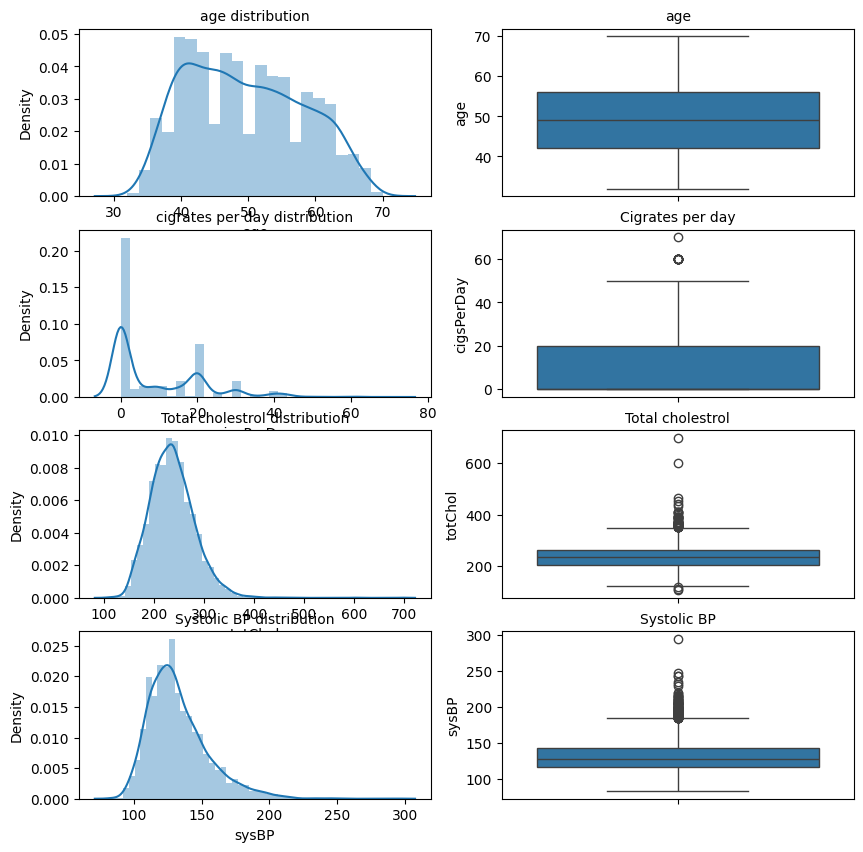

In [76]:
import warnings
warnings.filterwarnings('ignore')

#let's visualize the elements

fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(10.0, 10.0)
a = sns.distplot(df_im['age'], ax=axes[0][0])
a.set_title("age distribution", fontsize=10)

a = sns.boxplot(df_im['age'], orient="v", ax=axes[0][1])
a.set_title("age", fontsize=10)

a = sns.distplot(df_im['cigsPerDay'], ax = axes[1][0])
a.set_title("cigrates per day distribution", fontsize=10)


a = sns.boxplot(df_im['cigsPerDay'], orient='v', ax = axes[1][1])
a.set_title("Cigrates per day", fontsize=10)

a = sns.distplot(df_im['totChol'], ax = axes[2][0])
a.set_title("Total cholestrol distribution", fontsize=10)


a = sns.boxplot(df_im['totChol'], orient='v', ax = axes[2][1])
a.set_title("Total cholestrol", fontsize=10)

a = sns.distplot(df_im['sysBP'], ax = axes[3][0])
a.set_title("Systolic BP distribution", fontsize=10)


a = sns.boxplot(df_im['sysBP'], orient='v', ax = axes[3][1])
a.set_title("Systolic BP", fontsize=10)

plt.show()


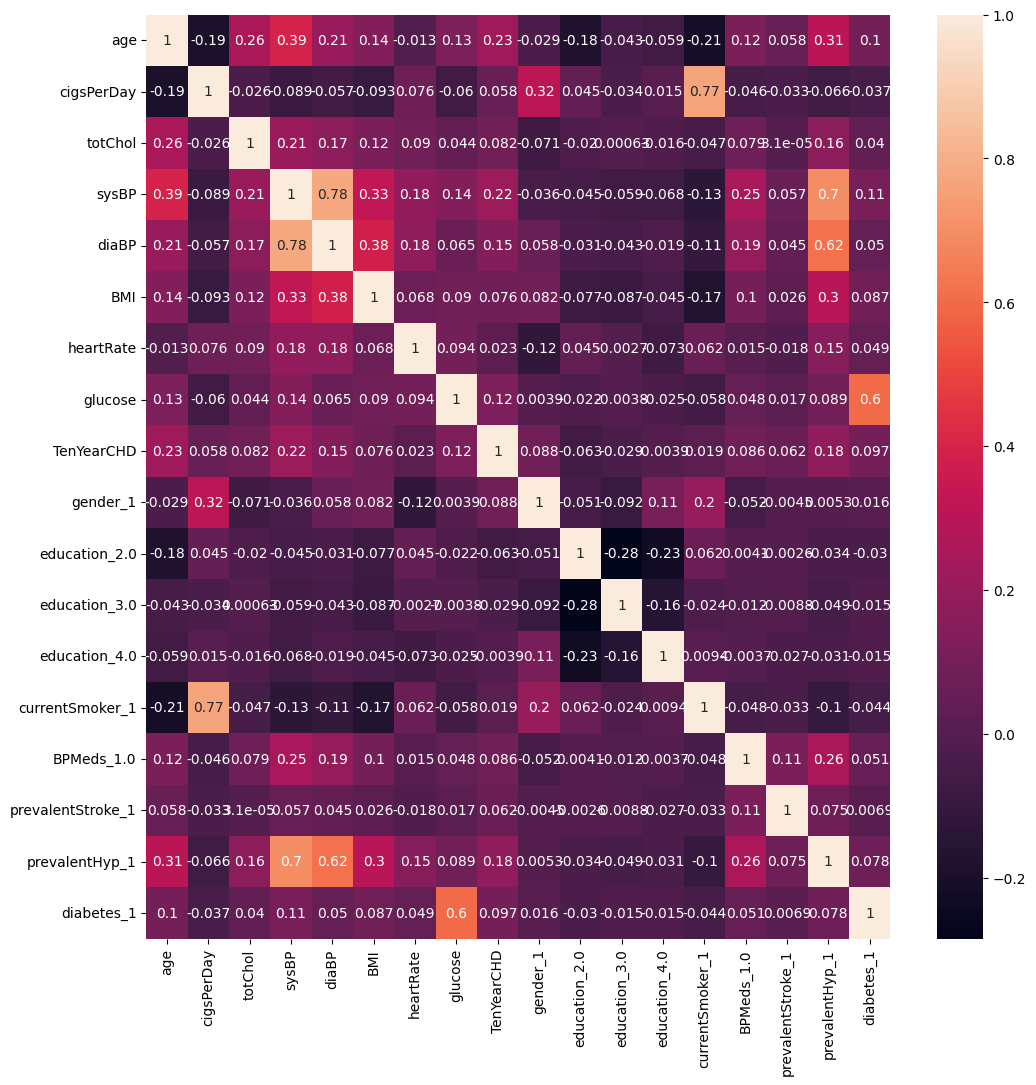

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df_im.corr(), annot=True)
plt.show()